# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load and preprocess the dataset

In [ ]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# dataset visualization

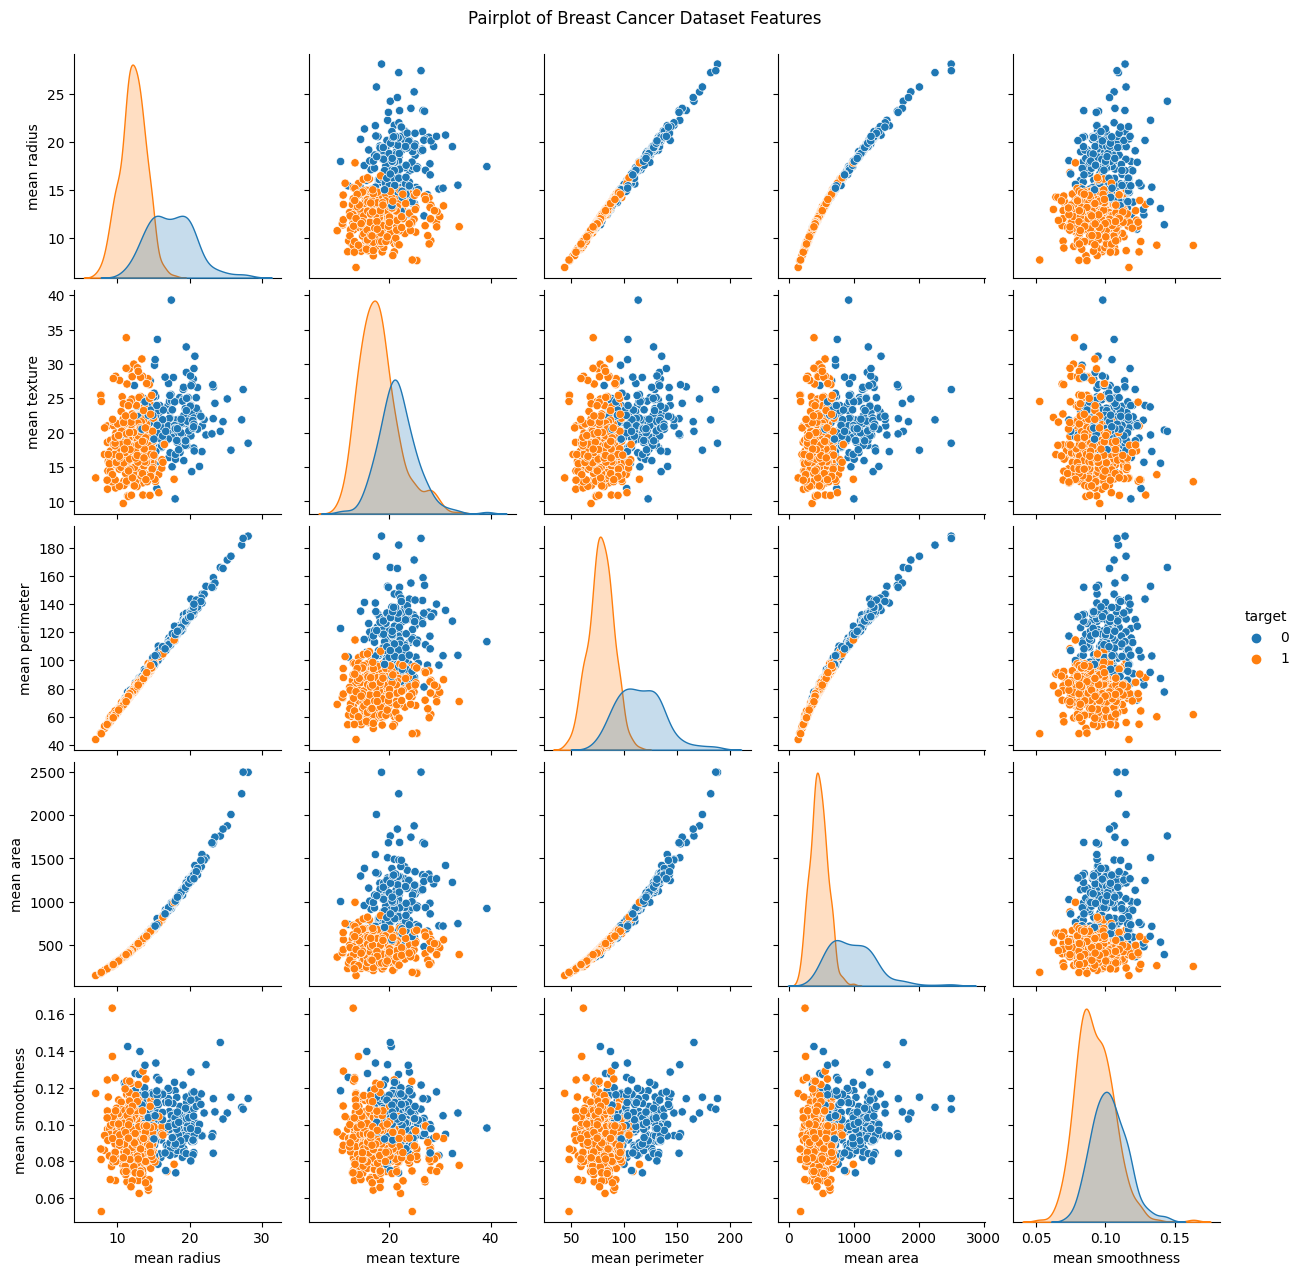

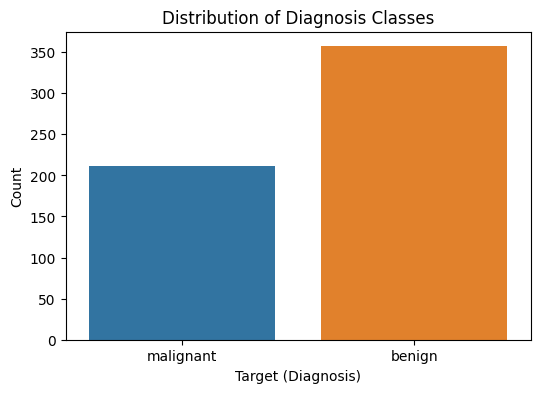

In [ ]:

# Convert to DataFrame for Seaborn plotting

df = pd.DataFrame(data=X, columns=breast_cancer.feature_names)
df['target'] = y

# Pairplot to visualize feature relationships
sns.pairplot(df, hue='target', vars=breast_cancer.feature_names[:5])
plt.suptitle("Pairplot of Breast Cancer Dataset Features", y=1.02)
plt.show()

# Countplot to visualize target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.xticks(ticks=[0, 1], labels=breast_cancer.target_names)
plt.xlabel('Target (Diagnosis)')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis Classes')
plt.show()

# Create and train pipelines for different models

In [ ]:
# Create pipelines for different models
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())]),
    'Decision Tree': Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('svm', SVC())]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
}

# Train models and store their accuracies
accuracies = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy


# Visualize the results

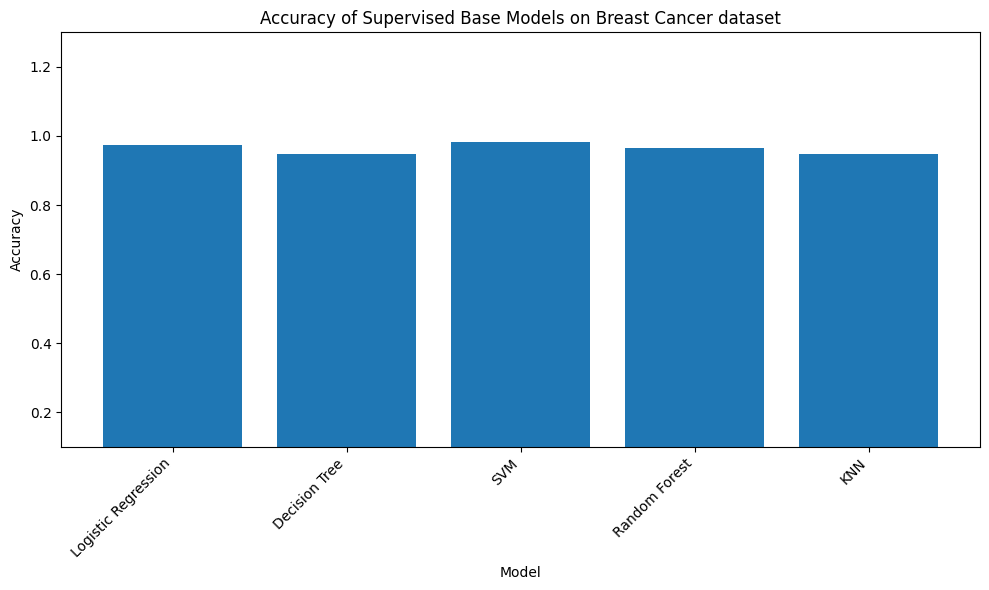

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.ylim(0.1, 1.3)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Supervised Base Models on Breast Cancer dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
